In [1]:
#Importing required libraries
import json
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import numpy as np
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import tweepy
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Tweet_limits = 50000

#tweet_list = [] #Creating list to append tweet data to

#for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ethereum since:2020-03-21 until:2022-04-30').get_items()):
#    if i>Tweet_limits:
#        break
#    tweet_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

In [3]:
#with open('ethereumtweet.json','w') as f:
#    json.dump(tweet_list,f, default=str)

Fetched the 50000 tweets for both bitcoin and ethereum based on the code shared above and saved them into json file for further analysis.

Going forward, we will do our analysis using the json files only.

In [4]:
#reading bitcoin tweets and ethereum tweets json into datafram

df = pd.read_json('bitcointweets.json')
df2 = pd.read_json('ethereumtweets.json')
df.head()

,0,1,2,3
0,2022-04-29 23:59:58+00:00,1520191193321295872,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,cr_bitcoin
1,2022-04-29 23:59:58+00:00,1520191192243265536,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,WorldCoinIndex
2,2022-04-29 23:59:58+00:00,1520191191098265608,#silver ape alert emergency update. Jump in : ...,AMoneyfest
3,2022-04-29 23:59:56+00:00,1520191181937954817,The Dilemma Faced by All Beginners in the Bitc...,pilscoop
4,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto


In [5]:
df2.head()

,0,1,2,3
0,2022-04-29 23:59:56+00:00,1520191181547884544,I know it may not feel like it but this is the...,win9999win
1,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto
2,2022-04-29 23:59:49+00:00,1520191152128937992,You know whose been swimming with their trunks...,ManagerMr1
3,2022-04-29 23:59:44+00:00,1520191133019684864,How much #Ethereum should one pleb own? 1 whol...,NatePolmateer
4,2022-04-29 23:59:28+00:00,1520191067420823553,Culpower found #ethereum in a User vault at th...,Culpower


In [6]:
#Changing the name of the columns as needed for bitcoin

df.rename(columns = {0:'Datetime'}, inplace = True)
df.rename(columns = {1:'Tweet_id'}, inplace = True)
df.rename(columns = {2:'Tweet'}, inplace = True)
df.rename(columns = {3:'User'}, inplace = True)

In [7]:
#Changing the name of the columns as needed for ethereum

df2.rename(columns = {0:'Datetime'}, inplace = True)
df2.rename(columns = {1:'Tweet_id'}, inplace = True)
df2.rename(columns = {2:'Tweet'}, inplace = True)
df2.rename(columns = {3:'User'}, inplace = True)

In [8]:
df.head()

,Datetime,Tweet_id,Tweet,User
0,2022-04-29 23:59:58+00:00,1520191193321295872,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,cr_bitcoin
1,2022-04-29 23:59:58+00:00,1520191192243265536,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,WorldCoinIndex
2,2022-04-29 23:59:58+00:00,1520191191098265608,#silver ape alert emergency update. Jump in : ...,AMoneyfest
3,2022-04-29 23:59:56+00:00,1520191181937954817,The Dilemma Faced by All Beginners in the Bitc...,pilscoop
4,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto


In [9]:
df2.head()

,Datetime,Tweet_id,Tweet,User
0,2022-04-29 23:59:56+00:00,1520191181547884544,I know it may not feel like it but this is the...,win9999win
1,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto
2,2022-04-29 23:59:49+00:00,1520191152128937992,You know whose been swimming with their trunks...,ManagerMr1
3,2022-04-29 23:59:44+00:00,1520191133019684864,How much #Ethereum should one pleb own? 1 whol...,NatePolmateer
4,2022-04-29 23:59:28+00:00,1520191067420823553,Culpower found #ethereum in a User vault at th...,Culpower


In [10]:
# Dropping all the data but tweets from bitcoin dataframe

df.drop('Tweet_id', inplace=True, axis=1)
df.drop('User', inplace=True, axis=1)

In [11]:
# Dropping all the data but tweets from ethereum dataframe

df2.drop('Tweet_id', inplace=True, axis=1)
df2.drop('User', inplace=True, axis=1)

In [12]:
df.head()

,Datetime,Tweet
0,2022-04-29 23:59:58+00:00,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...
1,2022-04-29 23:59:58+00:00,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
2,2022-04-29 23:59:58+00:00,#silver ape alert emergency update. Jump in : ...
3,2022-04-29 23:59:56+00:00,The Dilemma Faced by All Beginners in the Bitc...
4,2022-04-29 23:59:55+00:00,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...


In [13]:
df2.head()

,Datetime,Tweet
0,2022-04-29 23:59:56+00:00,I know it may not feel like it but this is the...
1,2022-04-29 23:59:55+00:00,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...
2,2022-04-29 23:59:49+00:00,You know whose been swimming with their trunks...
3,2022-04-29 23:59:44+00:00,How much #Ethereum should one pleb own? 1 whol...
4,2022-04-29 23:59:28+00:00,Culpower found #ethereum in a User vault at th...


In [14]:
# Inserting currency Column into bitcoin dataframe
df.insert(0, 'Currency', 'Bitcoin')

In [15]:
# Inserting currency Column into ethereum dataframe
df2.insert(0, 'Currency', 'Ethereum')

In [16]:
df.head()

,Currency,Datetime,Tweet
0,Bitcoin,2022-04-29 23:59:58+00:00,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...
1,Bitcoin,2022-04-29 23:59:58+00:00,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
2,Bitcoin,2022-04-29 23:59:58+00:00,#silver ape alert emergency update. Jump in : ...
3,Bitcoin,2022-04-29 23:59:56+00:00,The Dilemma Faced by All Beginners in the Bitc...
4,Bitcoin,2022-04-29 23:59:55+00:00,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...


In [17]:
df2.head()

,Currency,Datetime,Tweet
0,Ethereum,2022-04-29 23:59:56+00:00,I know it may not feel like it but this is the...
1,Ethereum,2022-04-29 23:59:55+00:00,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...
2,Ethereum,2022-04-29 23:59:49+00:00,You know whose been swimming with their trunks...
3,Ethereum,2022-04-29 23:59:44+00:00,How much #Ethereum should one pleb own? 1 whol...
4,Ethereum,2022-04-29 23:59:28+00:00,Culpower found #ethereum in a User vault at th...


In [18]:
#Changing Datetime datatype from object to datetime

df['Datetime'] = pd.to_datetime(df['Datetime'], errors = 'coerce')
df2['Datetime'] = pd.to_datetime(df2['Datetime'], errors = 'coerce')

In [19]:
#Keeping only dates in Datetime column and removing time stamp

df['Date'] = [d.date() for d in df['Datetime']]
df2['Date'] = [d.date() for d in df2['Datetime']]

In [20]:
# dropping datetime column containing both date and time as Date Column already created

df.drop('Datetime', inplace=True, axis=1)
df2.drop('Datetime', inplace=True, axis=1)

In [21]:
df.head()

,Currency,Tweet,Date
0,Bitcoin,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,2022-04-29
1,Bitcoin,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,2022-04-29
2,Bitcoin,#silver ape alert emergency update. Jump in : ...,2022-04-29
3,Bitcoin,The Dilemma Faced by All Beginners in the Bitc...,2022-04-29
4,Bitcoin,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,2022-04-29


In [22]:
df2.head()

,Currency,Tweet,Date
0,Ethereum,I know it may not feel like it but this is the...,2022-04-29
1,Ethereum,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,2022-04-29
2,Ethereum,You know whose been swimming with their trunks...,2022-04-29
3,Ethereum,How much #Ethereum should one pleb own? 1 whol...,2022-04-29
4,Ethereum,Culpower found #ethereum in a User vault at th...,2022-04-29


In [23]:
# Cleaning the data from #,link,spcial unwanted symbols, etc....

def cleanTwt(twt):
    twt = re.sub('#', '', twt)
    #twt = re.sub('#Bitcoin', 'Bitcoin', twt)
    twt = re.sub('#[A-Za-z0-9]', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', '', twt)
    twt = re.sub("@[A-Za-z0-9]+","",twt)
    twt = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", twt)
    twt = " ".join(twt.split())
    #twt = twt.replace("#", "").replace("", " ")
    return twt

In [24]:
#Applying the clean function to dataframes for both bitcoin and ethereum

df['Clean_Tweets'] = df['Tweet'].apply(cleanTwt)
df2['Clean_Tweets'] = df2['Tweet'].apply(cleanTwt)

In [25]:
#dropping tweet column as we will analyse only the cleaned tweets now

df.drop('Tweet', inplace=True, axis=1)
df2.drop('Tweet', inplace=True, axis=1)

In [26]:
df.head()

,Currency,Date,Clean_Tweets
0,Bitcoin,2022-04-29,"Bitcoin (BTC) Price Update: Price: $38,651Last..."
1,Bitcoin,2022-04-29,Bitcoin price index USD EUR CNY GBP RUB
2,Bitcoin,2022-04-29,silver ape alert emergency update. Jump in : L...
3,Bitcoin,2022-04-29,The Dilemma Faced by All Beginners in the Bitc...
4,Bitcoin,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...


In [27]:
df2.head()

,Currency,Date,Clean_Tweets
0,Ethereum,2022-04-29,I know it may not feel like it but this is the...
1,Ethereum,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...
2,Ethereum,2022-04-29,You know whose been swimming with their trunks...
3,Ethereum,2022-04-29,How much Ethereum should one pleb own? 1 whole...
4,Ethereum,2022-04-29,Culpower found ethereum in a User vault at thi...


In [28]:
df.shape

(42913, 3)

In [29]:
df2.shape

(50001, 3)

In [30]:
# understanding polarity and Subjectivity of the tweets

def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [31]:
#creating subjectivity and polarity columns into the dataframe and applying function

df['Subjectivity'] = df['Clean_Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Clean_Tweets'].apply(getPolarity)



df2['Subjectivity'] = df2['Clean_Tweets'].apply(getSubjectivity)

df2['Polarity'] = df2['Clean_Tweets'].apply(getPolarity)

In [32]:
df.head()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity
0,Bitcoin,2022-04-29,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.000000,0.000000
1,Bitcoin,2022-04-29,Bitcoin price index USD EUR CNY GBP RUB,0.000000,0.000000
2,Bitcoin,2022-04-29,silver ape alert emergency update. Jump in : L...,0.500000,0.136364
3,Bitcoin,2022-04-29,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714
4,Bitcoin,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000


In [33]:
df2.head()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity
0,Ethereum,2022-04-29,I know it may not feel like it but this is the...,0.294444,0.422222
1,Ethereum,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000
2,Ethereum,2022-04-29,You know whose been swimming with their trunks...,0.600000,-0.100000
3,Ethereum,2022-04-29,How much Ethereum should one pleb own? 1 whole...,0.533333,0.333333
4,Ethereum,2022-04-29,Culpower found ethereum in a User vault at thi...,1.000000,1.000000


In [34]:
#defining sentiment analysis function

def Sentiment(marks):
    if marks < 0:
        return 'Negative'
    elif marks == 0:
        return 'Neutral'
    else:

        return 'Positive'

In [35]:
#creating sentiment column and applying function

df['Sentiments'] = df['Polarity'].apply(Sentiment)
df2['Sentiments'] = df2['Polarity'].apply(Sentiment)

In [36]:
df.head()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,Bitcoin,2022-04-29,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.000000,0.000000,Neutral
1,Bitcoin,2022-04-29,Bitcoin price index USD EUR CNY GBP RUB,0.000000,0.000000,Neutral
2,Bitcoin,2022-04-29,silver ape alert emergency update. Jump in : L...,0.500000,0.136364,Positive
3,Bitcoin,2022-04-29,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714,Positive
4,Bitcoin,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000,Neutral


In [37]:
df2.head()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,Ethereum,2022-04-29,I know it may not feel like it but this is the...,0.294444,0.422222,Positive
1,Ethereum,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000,Neutral
2,Ethereum,2022-04-29,You know whose been swimming with their trunks...,0.600000,-0.100000,Negative
3,Ethereum,2022-04-29,How much Ethereum should one pleb own? 1 whole...,0.533333,0.333333,Positive
4,Ethereum,2022-04-29,Culpower found ethereum in a User vault at thi...,1.000000,1.000000,Positive


In [38]:
#Merging both the dataframes (bitcoin and ethereum) into one dataframe

merged_df = pd.concat([df, df2], ignore_index=True)

In [39]:
merged_df.shape

(92914, 6)

In [40]:
merged_df.head()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,Bitcoin,2022-04-29,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.000000,0.000000,Neutral
1,Bitcoin,2022-04-29,Bitcoin price index USD EUR CNY GBP RUB,0.000000,0.000000,Neutral
2,Bitcoin,2022-04-29,silver ape alert emergency update. Jump in : L...,0.500000,0.136364,Positive
3,Bitcoin,2022-04-29,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714,Positive
4,Bitcoin,2022-04-29,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000,Neutral


In [41]:
merged_df.tail()

,Currency,Date,Clean_Tweets,Subjectivity,Polarity,Sentiments
92909,Ethereum,2022-04-27,Ethereum SRL,0.000000,0.0,Neutral
92910,Ethereum,2022-04-27,Lava Flood NFTs btc ETH opensea Ethereum Polyg...,0.000000,0.0,Neutral
92911,Ethereum,2022-04-27,young SnAngel - Snake angel gold NFTs btc ETH ...,0.400000,0.1,Positive
92912,Ethereum,2022-04-27,Bitcoin Last Price $39009 BTC 🚀Daily Indicator...,0.066667,0.0,Neutral
92913,Ethereum,2022-04-27,🇹🇭 Ethereum(ETH) อาร์บิทราจ เหตุการณ์‼ ✅BestAs...,0.000000,0.0,Neutral


<AxesSubplot:>

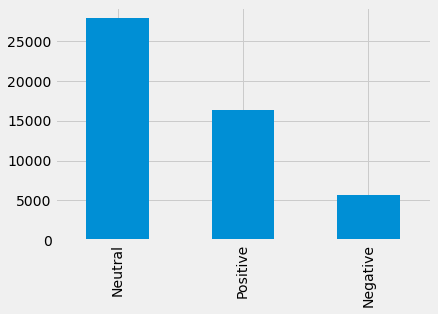

In [42]:
#Bar plot for ethereum

merged_df[merged_df['Currency'] == 'Ethereum']['Sentiments'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

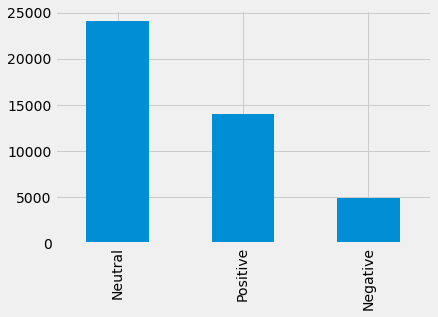

In [43]:
#Bar plot for bitcoin

merged_df[merged_df['Currency'] == 'Bitcoin']['Sentiments'].value_counts().plot(kind = 'bar')

In [44]:
#Plotting scatter plot between Polarity and Subjectivity


#plt.figure(figsize = (8,6))
#for i in range(0, df.shape[0]):
#    plt.scatter(df['Polarity'][i], df['Subjectivity'],[i],color='Blue')
#plt.show()

In [45]:
#reading crypto price data using json file and saving into dataframe

df3 = pd.read_json('crypto.json')
df3.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,200D_SMA,24h_%Change,7D_%Change,30D_%Change,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK
0,aave,2020-10-03,45070668,59594.0,56.16,56.16,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4354.6464,52.3973,7136.2512,44.5910,71.8848,390.8736
1,aave,2020-10-04,45070668,59594.0,56.16,52.83,0.0,0.0,0.0,0.0,0.0,-0.059295,0.0,0.0,4096.4382,49.2904,6713.1081,41.9470,67.6224,367.6968
2,aave,2020-10-05,86139601,550437.0,52.83,52.73,0.0,0.0,0.0,0.0,0.0,-0.001893,0.0,0.0,4088.6842,49.1971,6700.4011,41.8676,67.4944,367.0008
3,aave,2020-10-06,227116927,606807.0,52.73,41.51,0.0,0.0,0.0,0.0,0.0,-0.212782,0.0,0.0,3218.6854,38.7288,5274.6757,32.9589,53.1328,288.9096
4,aave,2020-10-07,191067038,475802.0,41.51,40.23,0.0,0.0,0.0,0.0,0.0,-0.030836,0.0,0.0,3119.4342,37.5346,5112.0261,31.9426,51.4944,280.0008


In [46]:
# merging crypto price dataframe and tweet daraframe into one dataframe

check = pd.concat([df3, merged_df], ignore_index=True)

In [47]:
check.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,...,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,aave,2020-10-03 00:00:00,45070668.0,59594.0,56.16,56.16,0.0,0.0,0.0,0.0,...,4354.6464,52.3973,7136.2512,44.5910,71.8848,390.8736,NaN,NaN,NaN,NaN
1,aave,2020-10-04 00:00:00,45070668.0,59594.0,56.16,52.83,0.0,0.0,0.0,0.0,...,4096.4382,49.2904,6713.1081,41.9470,67.6224,367.6968,NaN,NaN,NaN,NaN
2,aave,2020-10-05 00:00:00,86139601.0,550437.0,52.83,52.73,0.0,0.0,0.0,0.0,...,4088.6842,49.1971,6700.4011,41.8676,67.4944,367.0008,NaN,NaN,NaN,NaN
3,aave,2020-10-06 00:00:00,227116927.0,606807.0,52.73,41.51,0.0,0.0,0.0,0.0,...,3218.6854,38.7288,5274.6757,32.9589,53.1328,288.9096,NaN,NaN,NaN,NaN
4,aave,2020-10-07 00:00:00,191067038.0,475802.0,41.51,40.23,0.0,0.0,0.0,0.0,...,3119.4342,37.5346,5112.0261,31.9426,51.4944,280.0008,NaN,NaN,NaN,NaN


In [48]:
# replacing missing values for required text. It will help us in filtering purpose while analysing the data

check['MarketCap'] = check['MarketCap'].replace(np.NaN, 'Tweet Data')
check['Volume'] = check['Volume'].replace(np.NaN, 'Tweet Data')
check['Open'] = check['Open'].replace(np.NaN, 'Tweet Data')
check['Close'] = check['Close'].replace(np.NaN, 'Tweet Data')
check['7D_SMA'] = check['7D_SMA'].replace(np.NaN, 'Tweet Data')
check['20D_SMA'] = check['20D_SMA'].replace(np.NaN, 'Tweet Data')
check['50D_SMA'] = check['50D_SMA'].replace(np.NaN, 'Tweet Data')
check['100D_SMA'] = check['100D_SMA'].replace(np.NaN, 'Tweet Data')
check['Close_INR'] = check['Close_INR'].replace(np.NaN, 'Tweet Data')
check['Close_EUR'] = check['Close_EUR'].replace(np.NaN, 'Tweet Data')
check['Close_JPY'] = check['Close_JPY'].replace(np.NaN, 'Tweet Data')
check['Close_GBP'] = check['Close_GBP'].replace(np.NaN, 'Tweet Data')
check['Close_CAD'] = check['Close_CAD'].replace(np.NaN, 'Tweet Data')
check['Close_DKK'] = check['Close_DKK'].replace(np.NaN, 'Tweet Data')


check['Clean_Tweets'] = check['Clean_Tweets'].replace(np.NaN, 'Price Data')
check['Subjectivity'] = check['Subjectivity'].replace(np.NaN, 'Price Data')
check['Polarity'] = check['Polarity'].replace(np.NaN, 'Price Data')
check['Sentiments'] = check['Sentiments'].replace(np.NaN, 'Price Data')

In [49]:
check.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,...,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,aave,2020-10-03 00:00:00,45070668.0,59594.0,56.16,56.16,0.0,0.0,0.0,0.0,...,4354.6464,52.3973,7136.2512,44.591,71.8848,390.8736,Price Data,Price Data,Price Data,Price Data
1,aave,2020-10-04 00:00:00,45070668.0,59594.0,56.16,52.83,0.0,0.0,0.0,0.0,...,4096.4382,49.2904,6713.1081,41.947,67.6224,367.6968,Price Data,Price Data,Price Data,Price Data
2,aave,2020-10-05 00:00:00,86139601.0,550437.0,52.83,52.73,0.0,0.0,0.0,0.0,...,4088.6842,49.1971,6700.4011,41.8676,67.4944,367.0008,Price Data,Price Data,Price Data,Price Data
3,aave,2020-10-06 00:00:00,227116927.0,606807.0,52.73,41.51,0.0,0.0,0.0,0.0,...,3218.6854,38.7288,5274.6757,32.9589,53.1328,288.9096,Price Data,Price Data,Price Data,Price Data
4,aave,2020-10-07 00:00:00,191067038.0,475802.0,41.51,40.23,0.0,0.0,0.0,0.0,...,3119.4342,37.5346,5112.0261,31.9426,51.4944,280.0008,Price Data,Price Data,Price Data,Price Data


In [50]:
check.tail()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,...,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK,Clean_Tweets,Subjectivity,Polarity,Sentiments
203813,Ethereum,2022-04-27,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Ethereum SRL,0.0,0.0,Neutral
203814,Ethereum,2022-04-27,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Lava Flood NFTs btc ETH opensea Ethereum Polyg...,0.0,0.0,Neutral
203815,Ethereum,2022-04-27,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,young SnAngel - Snake angel gold NFTs btc ETH ...,0.4,0.1,Positive
203816,Ethereum,2022-04-27,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Bitcoin Last Price $39009 BTC 🚀Daily Indicator...,0.066667,0.0,Neutral
203817,Ethereum,2022-04-27,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,🇹🇭 Ethereum(ETH) อาร์บิทราจ เหตุการณ์‼ ✅BestAs...,0.0,0.0,Neutral


In [51]:
# saving bitcoin tweet data in a single dataframe

check_bitcoin_tweetdata = check[check['Currency'] == 'Bitcoin']
check_bitcoin_tweetdata = check_bitcoin_tweetdata[check_bitcoin_tweetdata['MarketCap'] == 'Tweet Data']


In [52]:
check_bitcoin_tweetdata.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,...,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK,Clean_Tweets,Subjectivity,Polarity,Sentiments
110904,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.0,0.0,Neutral
110905,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Bitcoin price index USD EUR CNY GBP RUB,0.0,0.0,Neutral
110906,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,silver ape alert emergency update. Jump in : L...,0.5,0.136364,Positive
110907,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714,Positive
110908,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.0,Neutral


In [53]:
check_bitcoin_tweetdata.tail()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,...,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK,Clean_Tweets,Subjectivity,Polarity,Sentiments
153812,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Truth is that your “save the planet from Bitco...,1.0,1.0,Positive
153813,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Bitcoin ATM installed in Mexico's Senate Build...,0.0,0.0,Neutral
153814,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Ünlü Yatırım Bankasından Dünyada Bir İlk! Bitc...,0.0,0.0,Neutral
153815,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,BTC bitcoin GÜNCEL ANALİZDostlar grafiğe ekled...,0.0,0.0,Neutral
153816,Bitcoin,2022-04-29,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,...,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Tweet Data,Current Bitcoin Price is $39522 BTC Crypto,0.4,0.0,Neutral


<AxesSubplot:>

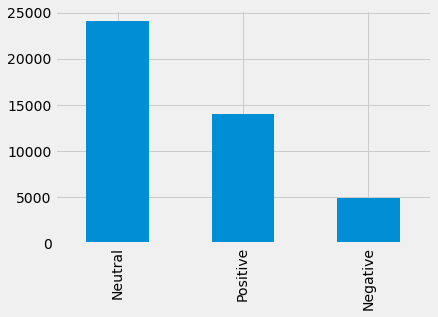

In [54]:
#Bar plot for bitcoin

check_bitcoin_tweetdata['Sentiments'].value_counts().plot(kind = 'bar')

In [55]:
# Defining CAGR function which will help in calculating the CAGR

def CAGR(start, end, time):
    Growth_Rate = (end/start)**(1/time)-1
    return Growth_Rate

In [56]:
df3.head(2)

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,200D_SMA,24h_%Change,7D_%Change,30D_%Change,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK
0,aave,2020-10-03,45070668,59594.0,56.16,56.16,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4354.6464,52.3973,7136.2512,44.591,71.8848,390.8736
1,aave,2020-10-04,45070668,59594.0,56.16,52.83,0.0,0.0,0.0,0.0,0.0,-0.059295,0.0,0.0,4096.4382,49.2904,6713.1081,41.947,67.6224,367.6968


In [57]:
#Saving bitcoin data into one file

df_bitcoin = df3[df3['Currency'] == 'bitcoin']
df_bitcoin.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,200D_SMA,24h_%Change,7D_%Change,30D_%Change,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK
7073,bitcoin,2016-05-01,7012822522,394606186.0,452.59,444.49,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,34465.7546,414.7092,56481.3443,352.9251,568.9472,3093.6504
7074,bitcoin,2016-05-02,6888908380,679795242.0,444.49,450.30,0.0,0.0,0.0,0.0,0.0,0.013071,0.0,0.0,34916.2620,420.1299,57219.6210,357.5382,576.3840,3134.0880
7075,bitcoin,2016-05-03,6980741978,460396814.0,450.30,447.12,0.0,0.0,0.0,0.0,0.0,-0.007062,0.0,0.0,34669.6848,417.1630,56815.5384,355.0133,572.3136,3111.9552
7076,bitcoin,2016-05-04,6933273129,430680620.0,447.12,448.92,0.0,0.0,0.0,0.0,0.0,0.004026,0.0,0.0,34809.2568,418.8424,57044.2644,356.4425,574.6176,3124.4832
7077,bitcoin,2016-05-05,6962982235,547921246.0,448.92,461.62,0.0,0.0,0.0,0.0,0.0,0.028290,0.0,0.0,35794.0148,430.6915,58658.0534,366.5263,590.8736,3212.8752


In [58]:
#Saving ethereum data into one file

df_ethereum = df3[df3['Currency'] == 'ethereum']
df_ethereum.head()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,200D_SMA,24h_%Change,7D_%Change,30D_%Change,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK
36676,ethereum,2016-05-01,703213705,16329849.0,8.83,10.11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,783.9294,9.4326,1284.6777,8.0273,12.9408,70.3656
36677,ethereum,2016-05-02,805073118,40531647.0,10.11,9.29,0.0,0.0,0.0,0.0,0.0,-0.081108,0.0,0.0,720.3466,8.6676,1180.4803,7.3763,11.8912,64.6584
36678,ethereum,2016-05-03,739862094,20068196.0,9.29,9.41,0.0,0.0,0.0,0.0,0.0,0.012917,0.0,0.0,729.6514,8.7795,1195.7287,7.4715,12.0448,65.4936
36679,ethereum,2016-05-04,750420702,16758119.0,9.41,9.83,0.0,0.0,0.0,0.0,0.0,0.044633,0.0,0.0,762.2182,9.1714,1249.0981,7.8050,12.5824,68.4168
36680,ethereum,2016-05-05,783653893,17630163.0,9.83,9.28,0.0,0.0,0.0,0.0,0.0,-0.055951,0.0,0.0,719.5712,8.6582,1179.2096,7.3683,11.8784,64.5888


In [59]:
df_ethereum.tail()

,Currency,Date,MarketCap,Volume,Open,Close,7D_SMA,20D_SMA,50D_SMA,100D_SMA,200D_SMA,24h_%Change,7D_%Change,30D_%Change,Close_INR,Close_EUR,Close_JPY,Close_GBP,Close_CAD,Close_DKK
38842,ethereum,2022-05-12,250066823475,4.654801e+10,2080.91,1966.70,2357.295714,2686.6690,2993.8366,2902.9443,3395.59915,-0.054885,-0.285860,-0.352678,152497.9180,1834.9311,249908.5690,1561.5598,2517.3760,13688.2320
38843,ethereum,2022-05-13,238137944006,4.162173e+10,1966.70,2010.21,2258.795714,2640.1450,2971.9076,2895.0721,3385.69665,0.022123,-0.255398,-0.355991,155871.6834,1875.5259,255437.3847,1596.1067,2573.0688,13991.0616
38844,ethereum,2022-05-14,243391440609,2.397953e+10,2010.21,2064.23,2176.367143,2597.2115,2951.0708,2888.8112,3375.12060,0.026873,-0.218459,-0.317253,160060.3942,1925.9266,262301.7061,1638.9986,2642.2144,14367.0408
38845,ethereum,2022-05-15,249319115268,1.439577e+10,2064.23,2147.05,2123.398571,2554.1470,2931.1942,2883.6091,3365.38115,0.040121,-0.147262,-0.294993,166482.2570,2003.1977,272825.6435,1704.7577,2748.2240,14943.4680
38846,ethereum,2022-05-16,259350256988,1.439546e+10,2147.05,2025.89,2091.398571,2515.1040,2906.0086,2873.9370,3354.35955,-0.056431,-0.099560,-0.339318,157087.5106,1890.1554,257429.8423,1608.5567,2593.1392,14100.1944


In [60]:
#Extracting Close price data for a particular date

start_btc = float(df_bitcoin.Close[df_bitcoin.Date == '2020-04-30'])
start_eth = float(df_ethereum.Close[df_ethereum.Date == '2020-04-30'])
print(start_eth)
print(start_btc)

205.56
8610.64


In [61]:
#Extracting Close price data for a particular date

end_btc = float(df_bitcoin.Close[df_bitcoin.Date == '2022-05-01'])
end_eth = float(df_ethereum.Close[df_ethereum.Date == '2022-05-01'])
print(end_eth)
print(end_btc)

2832.51
38538.0


In [62]:
#Calculating CAGR for ethereum in the last 2 years

eth_CAGR = CAGR(start_eth, end_eth, 2)
btc_CAGR = CAGR(start_btc, end_btc, 2)

print('Etherium grows with a CAGR of {:.2%}'.format(eth_CAGR))
print('Bitcoin grows with a CAGR of {:.2%}'.format(btc_CAGR))

Etherium grows with a CAGR of 271.21%
Bitcoin grows with a CAGR of 111.56%


In [63]:
# Defining forcast function 

def forecast(end, CAGRr, years):
    forc = end + (1+CAGRr)**years
    return forc

In [64]:
# forcasting ethereum price in next 6 years based on CAGR calculated

years = 6

print('Forcast for ethereum in 6 years time', forecast(end_eth, eth_CAGR, years))
print('Forcast for bitcoin in 6 years time', forecast(end_btc, btc_CAGR, years))

Forcast for ethereum in 6 years time 5448.876189996257
Forcast for bitcoin in 6 years time 38627.65225552491
